Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
path ='/content/drive/My Drive/Colab Notebooks/NLP Projects/Sentiment Analysis/' 
stopwords_list = path+'bangla_stopwords.txt'
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [92]:

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bangladeshi  Celebrity Page Dataset - Sheet1.csv',encoding='UTF-8')

data.head(10)


,Name,Comment Link,Tag,Comment,Unnamed: 4
0,Sabnam Faria,https://www.facebook.com/FariaSabnamTripti/pos...,Neutral,আটা ময়দা ছাড়া একটু দেখতে চাই,NaN
1,Sabnam Faria,https://www.facebook.com/FariaSabnamTripti/pos...,Positive,তোমাকে বড় চুলেও বোমার মতো দেখতে লাগে এবং তুমি...,NaN
2,Sabnam Faria,https://www.facebook.com/FariaSabnamTripti/pos...,Positive,খুব সুন্দর,NaN
3,Sabnam Faria,https://www.facebook.com/FariaSabnamTripti/pos...,Neutral,আমি ও মিস করছি,NaN
4,Sabnam Faria,https://www.facebook.com/FariaSabnamTripti/pos...,Negative,শুধু তোমার চুল ওই ছোট নয় তোমার বডি ও অনেক ছোট,NaN
5,Sabnam Faria,https://www.facebook.com/FariaSabnamTripti/pos...,Positive,বড় চুল একজন নারীর সৌন্দর্য ফুটিয়ে তুলে,NaN
6,Sabnam Faria,https://www.facebook.com/FariaSabnamTripti/pos...,Neutral,সৌদি বাদশার পক্ষ থেকে অভিনন্দন সুন্দর ছবি আপলো...,NaN
7,Sabnam Faria,https://www.facebook.com/FariaSabnamTripti/pos...,Positive,আবার রাখো ! তোমাকে সুন্দর লাগবে !,NaN
8,Sabnam Faria,https://www.facebook.com/FariaSabnamTripti/pos...,Negative,বেবি আমি তোমার তোমার ফিগারের ফিদা,NaN
9,Sabnam Faria,https://www.facebook.com/FariaSabnamTripti/pos...,Negative,তোমার বুদ্ধিমত্তায় আমি খুবই সন্তুষ্ট তোমার চল...,NaN


Dataset Preparation

In [93]:
data = data.drop(columns = ['Unnamed: 4'])


In [94]:
data.head()

,Name,Comment Link,Tag,Comment
0,Sabnam Faria,https://www.facebook.com/FariaSabnamTripti/pos...,Neutral,আটা ময়দা ছাড়া একটু দেখতে চাই
1,Sabnam Faria,https://www.facebook.com/FariaSabnamTripti/pos...,Positive,তোমাকে বড় চুলেও বোমার মতো দেখতে লাগে এবং তুমি...
2,Sabnam Faria,https://www.facebook.com/FariaSabnamTripti/pos...,Positive,খুব সুন্দর
3,Sabnam Faria,https://www.facebook.com/FariaSabnamTripti/pos...,Neutral,আমি ও মিস করছি
4,Sabnam Faria,https://www.facebook.com/FariaSabnamTripti/pos...,Negative,শুধু তোমার চুল ওই ছোট নয় তোমার বডি ও অনেক ছোট


In [95]:
print("Total Reviews:",len(data),
      "\nTotal Positive Reviews:",len(data[data.Tag =='Positive']),
      "\nTotal Negative Reviews:",len(data[data.Tag=='Negative']),
      "\nTotal Neutral Reviews:",len(data[data.Tag =='Neutral']))
      

Total Reviews: 11303 
Total Positive Reviews: 1670 
Total Negative Reviews: 3285 
Total Neutral Reviews: 5559


In [96]:
data.columns

Index(['Name', 'Comment Link', 'Tag', 'Comment'], dtype='object')

In [97]:

# print some unprocessed reviews
sample_data = [10,100,150,200,250,600,650,666,689,640,650,700,750,800,1000]
for i in sample_data:
      print(data.Comment[i],'\n','Sentiment:-- ',data.Tag[i],'\n')

- আমি যার কপালে আছি, 
 Sentiment:--  Neutral 

চুল ছোট রাখাকে তোমরা ফ্যশন বানাই ফেলছ আর এই চুলেরে মিস কর দেখলে অট্টহাসি আসে 
 Sentiment:--  Negative 

চাপাচাপি বা ঠেলাঠেলির দরকার নাই 
 Sentiment:--  Negative 

অনেক সুন্দার তাই তো 
 Sentiment:--  Positive 

নিজের চুলকাইতে স্ট্যাটাস দেয় মিস মাই হেয়ার আবাল জানি কোথাকার 
 Sentiment:--  Negative 

আপনাকে আপু ডাকি বলে অনেকে হিংসে করে কি করব আমি 
 Sentiment:--  Neutral 

আবার বউ সাজতে ইচ্ছা করে না কি? 
 Sentiment:--  Negative 

কোনো কিছু লিখলেই ফ্রেন্ডলিস্টে সবাই দেখে ফেলে তাই চাইনিজে লেখলাম 
 Sentiment:--  Neutral 

কারো বিরুদ্ধে সমালোচনা করার চেয়ে, নিজের মন মানষিকতা পাল্টানো জরুরী। 
 Sentiment:--  Neutral 

জামাই নাহ থাকলে 
 Sentiment:--  Neutral 

আবার বউ সাজতে ইচ্ছা করে না কি? 
 Sentiment:--  Negative 

পরে না চোখের পলক, কি তাহার রুপের ঝলক 
 Sentiment:--  Neutral 

তোমাকেই ভালবাসি একমাত্র! 
 Sentiment:--  Positive 

যত্নে রাখা চুল গুলো অচিরেই ঝরে পরে যায় অযত্নে রাখা বাল গুলো টানলেও ছিড়ে না,,,, 
 Sentiment:--  Negative 

নুন তো একটু তেতো

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


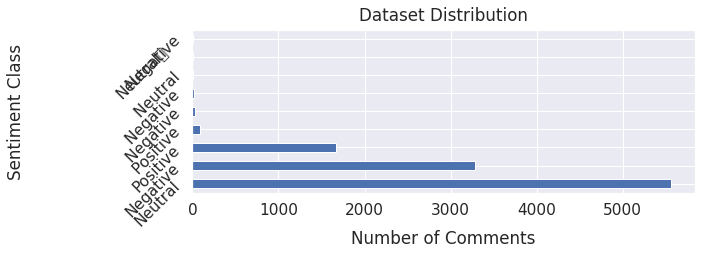

In [98]:

sns.set(font_scale=1.4)
data['Tag'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

Data Cleaning

In [99]:

# Data cleaning function
def process_comments(Comment): 
    Comment = re.sub('[^\u0980-\u09FF]',' ',str(Comment)) #removing unnecessary punctuation
    return Comment

In [100]:
# Apply the function into the dataframe
data['cleaned'] = data['Comment'].apply(process_comments)  

# print some cleaned reviews from the dataset
sample_data = [10,100,25,854,966,1500,1589,1700,2000,2500,4000,4500]
for i in sample_data:
     print('Original:\n',data.Comment[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Sentiment:-- ',data.Tag[i],'\n')

Original:
 - আমি যার কপালে আছি, 
Cleaned:
   আমি যার কপালে আছি  
 Sentiment:--  Neutral 

Original:
 চুল ছোট রাখাকে তোমরা ফ্যশন বানাই ফেলছ আর এই চুলেরে মিস কর দেখলে অট্টহাসি আসে 
Cleaned:
 চুল ছোট রাখাকে তোমরা ফ্যশন বানাই ফেলছ আর এই চুলেরে মিস কর দেখলে অট্টহাসি আসে 
 Sentiment:--  Negative 

Original:
 শিক্ষা মন্ত্রণালয়ের এইরকম শৈরাচরী সিদ্ধান্ত মানি না, মানবো না। তারা একটিবারও শিক্ষার্থীদের কথা বিবেচনা করলো না! আমরা নবম শ্রেণিতে ক্লাস করেছি মাত্র তিন মাস, যদিও এই তিন মাসের প্রায়  অধিকাংশ সময়ই ভর্তি আর বিভাগ নির্বাচন এর মধ্য দিয়ে শেষ হয়ে গেছে,  আর যদ… 
Cleaned:
 শিক্ষা মন্ত্রণালয়ের এইরকম শৈরাচরী সিদ্ধান্ত মানি না  মানবো না  তারা একটিবারও শিক্ষার্থীদের কথা বিবেচনা করলো না  আমরা নবম শ্রেণিতে ক্লাস করেছি মাত্র তিন মাস  যদিও এই তিন মাসের প্রায়  অধিকাংশ সময়ই ভর্তি আর বিভাগ নির্বাচন এর মধ্য দিয়ে শেষ হয়ে গেছে   আর যদ  
 Sentiment:--  Neutral
 

Original:
 লকডাউন শুনলাম আরো সাত দিন বাড়াবে 
Cleaned:
 লকডাউন শুনলাম আরো সাত দিন বাড়াবে 
 Sentiment:--  Neutral 

Original:
 আমি কিন্তু তোমার জন্য এ

Remove Low lenght data

In [101]:
# Length of each Reveiws
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
# Remove the reviews with least words
dataset = data.loc[data.length>1]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(data)-len(dataset)),
      "\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 886 Small Reviews 
Total Reviews: 10417


Dataset Summary

In [102]:
def data_summary(dataset):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Tag.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Tag==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.Tag==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Tag==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)


Class Name :  Neutral
Number of Documents:5454
Number of Words:49741
Number of Unique Words:9258
Most Frequent Words:

না	961
এই	585
আমার	533
আমি	465
করে	462
কিছু	389
আর	375
কি	371
ছবি	320
তোমার	312

Class Name :  Negative
Number of Documents:3275
Number of Words:36136
Number of Unique Words:7943
Most Frequent Words:

না	631
করে	373
এই	371
আমার	336
কি	301
আর	285
তোমার	281
ছবি	255
আমি	234
জন্য	211

Class Name :  Positive
Number of Documents:1536
Number of Words:11871
Number of Unique Words:2714
Most Frequent Words:

সুন্দর	447
তুমি	226
অনেক	182
খুব	161
তোমার	159
আমার	148
ছবি	144
ভালো	140
এই	124
আপু	123

Class Name :                        Positive
Number of Documents:81
Number of Words:705
Number of Unique Words:464
Most Frequent Words:

সুন্দর	16
না	10
থেকে	9
ঈদ	9
করে	8
এই	8
ছবি	7
একটা	7
জয়া	7
মতো	7

Class Name :                         Negative
Number of Documents:35
Number of Words:409
Number of Unique Words:268
Most Frequent Words:

আমার	9
আমি	9
তোমার	7
সাথে	6
তোর	6
তো	6
দেখে	5
মনে

Dataset Summary Visualization

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


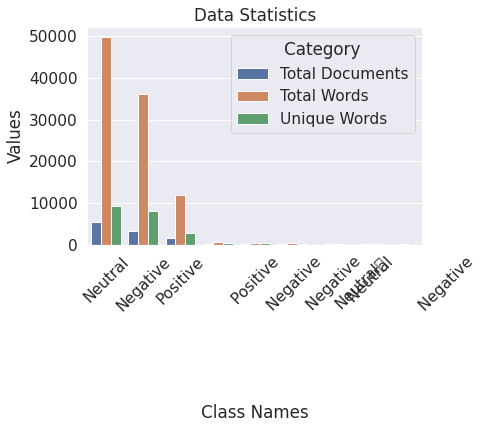

In [103]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

Comment Lenght Distribution

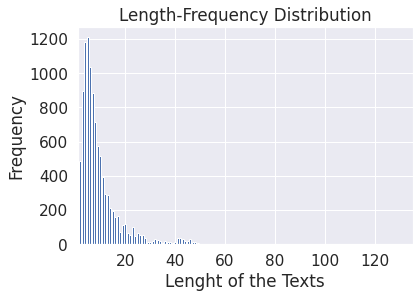

Maximum Length of a review: 54
Minimum Length of a review: 2
Average Length of a reviews: 10.0


In [104]:
# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength),0)}")

Take only Positive and Negative Class for Model Building

In [105]:

neutral = dataset[dataset.Tag == 'Neutral']
negative = dataset[dataset.Tag == 'Negative'][:4000]
dataset = neutral.append(negative,ignore_index=True)
dataset.Tag.value_counts()

Neutral     5454
Negative    3275
Name: Tag, dtype: int64

**Lable Encoding and Dataset Splitting**

In [106]:
#==================================================
                                       ################# Label Encoding Function #########
                                       #==================================================

def label_encoding(sentiment,bool):
    """
    This function will return the encoded labels in array format. 
    
    Args:
        sentiment: series of class names(str)
        bool: boolean (True or False)
        
    Returns:
        labels: numpy array 
    """
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels



                           #===========================================================
                           ################# Dataset Splitting Function ###############
                           #=========================================================== 

def dataset_split(feature_space,sentiment):
    """
    This function will return the splitted (80%-20%) feature vector . 
    
    Args:
        feature_space: calcuated feature vector (sparse matrix)
        sentiment: encoded lables (array) 
        
    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
    """

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test

In [83]:
dataset.cleaned = dataset.cleaned.apply(lambda x:x.replace('\n',' '))

Model Building Using Machine Learning
Feature Extraction Using TF-IDF 

In [107]:
#======================================
                                            ##### Unigram Tf-idf value calculation
                                            #======================================
            
def calc_gram_tfidf(reviews,gram):
    """
    This function will return the tf-idf value of the respective gram features . 
    
    Args:
        reviews: a list of cleaned reviews   
        
    Returns:
        tfidf: a instance of TfidfVectorizer
        X : Unigram Feature Vector (sparse matrix)
    """
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

In [111]:
#============================================
                                              #########  Classifiers Defination  #########
                                              #============================================
def ml_models_defination(): 
    """
    This function consists the models defination for All gram Features
    
    Retuns:
        ml_models: list of models
        model_names: list of model_names
    
    """
    
    lr_model = LogisticRegression(random_state = 123)
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    mnb_model = MultinomialNB(alpha=0.15)
    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM']
    #model_names = ['Logistic Regression']
    # Create list of models
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model]
    #ml_models = [lr_model]
    return ml_models,model_names 


                                          #============================================
                                           ####### Model Evaluation Function ############
                                           #=============================================

def model_performace(model,X_train,X_test,y_train,y_test):
    """
    This function will return the performance parameter values of each ML models.
    Performance parameters are Accuracy, F1-Score, Precision, Recall.
    
    Args:
        model: a ML model instance
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
        
    Returns:
        my_dict: a dictionary of all the parameters for each models
    """
    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y),4)*100 
    
    return my_dict  

                                        #========================================
                                        #### Model Performane into Dataframe #####
                                        #=========================================
            
def performance_table(performance_dict):
    """
    This function will create a dataframe of all the performance parameters.
    
    Args:
        performance_dict: a dictionary of all the parameters for each models
        
    Returns:
        performance_df: a dataframe
    """

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    model_names = ['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df


Model Training

In [112]:
## save the performance of the model for each gram feature 
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.cleaned,gram)
    labels = label_encoding(dataset.Tag,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    ml_models,model_names = ml_models_defination()
    # call model accuracy function and save the metrices into a dictionary
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    #Save the performance parameter into json file
    with open(path+f'ml_performance_{gram_names[i]}.json', 'w') as f:
           json.dump(accuracy, f)

Feature Size :======> 13386

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 8729 
	Training		 7856 
	Test			 873
Feature Size :======> 59854

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 8729 
	Training		 7856 
	Test			 873
Feature Size :======> 109336

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 8729 
	Training		 7856 
	Test			 873


Performance Table

In [113]:

# Load all the json files
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  print(f"\n========== Performace Table for {gram} feature:========\n",table)
  print(f"\n========In case of {gram} feature:========\n")
  print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {max(table.Accuracy)}")
  print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {max(table['F1 Score'] )}")
  print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {max(table['Precision'] )}")
  print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {max(table['Recall'] )}")


========== Performace Table for Unigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     71.36      70.22   93.54     80.22          LR
1     69.07      72.08   81.92     76.68          DT
2     73.42      71.95   93.73     81.41          RF
3     74.68      76.88   84.69     80.60         MNB
4     72.16      72.41   89.11     79.90         KNN
5     66.78      65.52   98.15     78.58  Linear SVM
6     68.61      67.01   97.42     79.40     RBF SVM

========In case of Unigram feature:========

Highest Accuracy achieved by MNB at = 74.68
Highest F1-Score achieved by RF at = 81.41000000000001
Highest Precision Score achieved by MNB at = 76.88000000000001
Highest Recall Score achieved by Linear SVM at = 98.15

========== Performace Table for Bigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     69.64      67.96   96.68     79.82          LR
1     68.96      72.70   80.07     76.21          DT
2     71.25      69.85   94.46     80

Performance Visualization

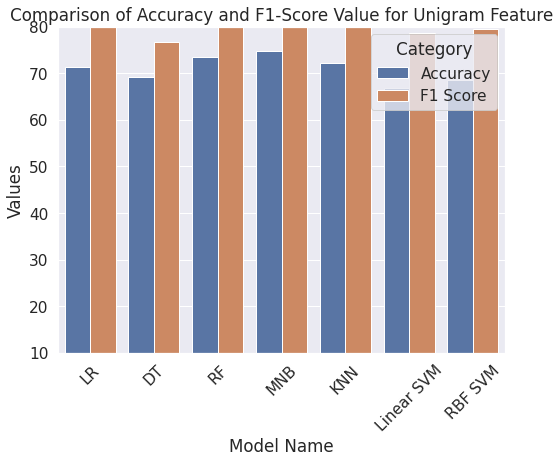

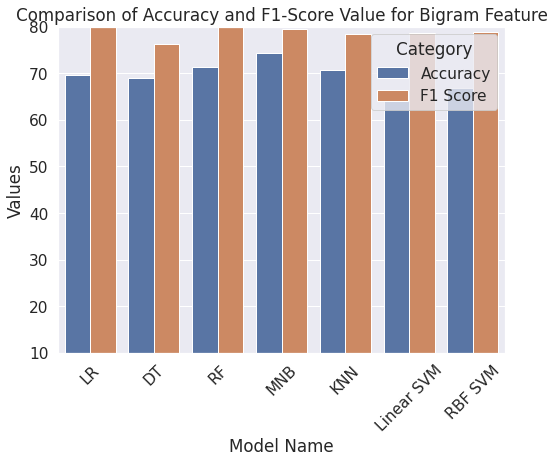

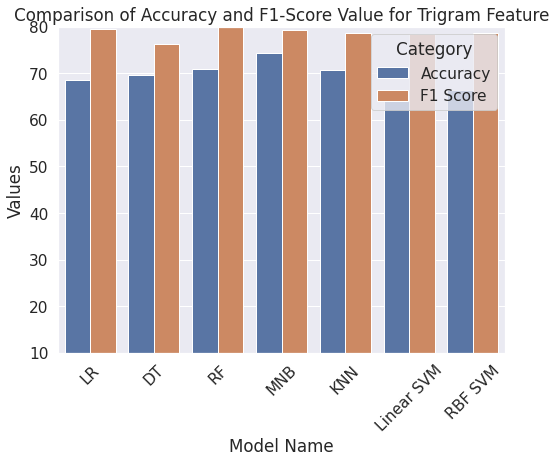

In [114]:
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  df = pd.melt(table[['Accuracy','F1 Score','Model Name']], id_vars="Model Name", var_name="Category", value_name="Values")
  plt.figure(figsize=(8,6))
  ax = plt.subplot()
  sns.barplot(data=df,x='Model Name', y='Values' ,hue='Category')
  ax.set_xlabel('Model Name') 
  ax.set_title(f'Comparison of Accuracy and F1-Score Value for {gram} Feature')
  ax.set_ylim([10,80])
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);